Credit Card fraud detection

Importing necessary libraries


In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA



1. **StandardScaler**: This function is used to standardize features by removing the mean and scaling them to unit variance. This step is crucial when the features have different scales or units, ensuring that all features contribute equally to the model training.

2. **LogisticRegression**: This model implements the Logistic Regression algorithm, commonly used for binary or multiclass classification tasks. It predicts the probability of a class by applying a logistic function to the weighted sum of input features.

3. **LinearDiscriminantAnalysis (LDA)**: LDA is a classification technique used to model the difference between multiple classes by finding the linear combinations of features that best separate the classes. It can be used for dimensionality reduction as well as classification.

4. **cross_val_score**: This function is used for cross-validation, where the dataset is split into multiple folds to evaluate the model's performance across different subsets of data. It helps assess the generalization ability of the model.

5. **train_test_split**: This function splits the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the model's performance on unseen data.

6. **classification_report**: This function generates a report that includes important classification metrics such as precision, recall, F1-score, and support for each class. It helps assess how well the model performs across all classes.

7. **confusion_matrix**: The confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives, providing insight into the model’s accuracy and errors.

8. **roc_auc_score**: This function computes the Receiver Operating Characteristic (ROC) Area Under the Curve (AUC), which measures the model's ability to distinguish between classes. A higher AUC value indicates better model performance.

9. **PCA**: PCA is a dimensionality reduction technique that transforms the dataset into a lower-dimensional space while preserving as much variance as possible. It is useful for reducing computational complexity and mitigating the curse of dimensionality in high-dimensional datasets.


(a) Dateset loading and overview

In [2]:
# Load dataset
data = pd.read_csv('creditcard_2023.csv')

# Display basic information
display(data.head())

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# Overview of the dataset
print("Shape of the dataset:", data.shape)
print("\nColumn names:\n", data.columns)
print("\nBasic statistics:\n", data.describe())
print("\nData types:\n", data.dtypes)

Shape of the dataset: (568630, 31)

Column names:
 Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Basic statistics:
                   id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.22

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
missing_fraction = missing_values / len(data)
print("Missing values :\n", missing_values)
print("\nFraction of missing values:\n", missing_fraction)

Missing values :
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fraction of missing values:
 id        0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


Cell 4: Exploring the Target Variable (Class Distribution)

Class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


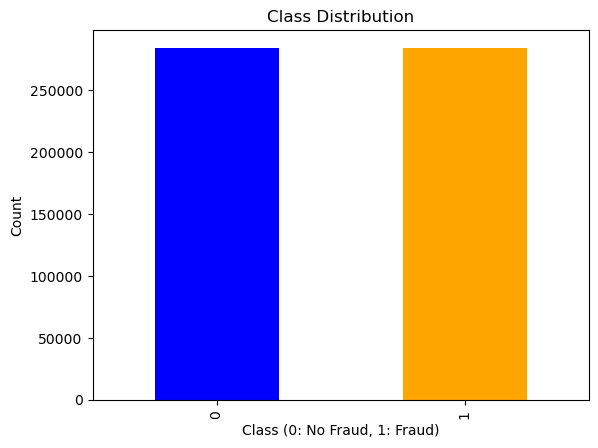

In [5]:
# Class distribution
class_counts = data['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Ploting class distribution
class_counts.plot(kind='bar', color=['blue', 'orange'], title='Class Distribution')
plt.xlabel('Class (0: No Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


Cell 5: Histograms of Selected Features

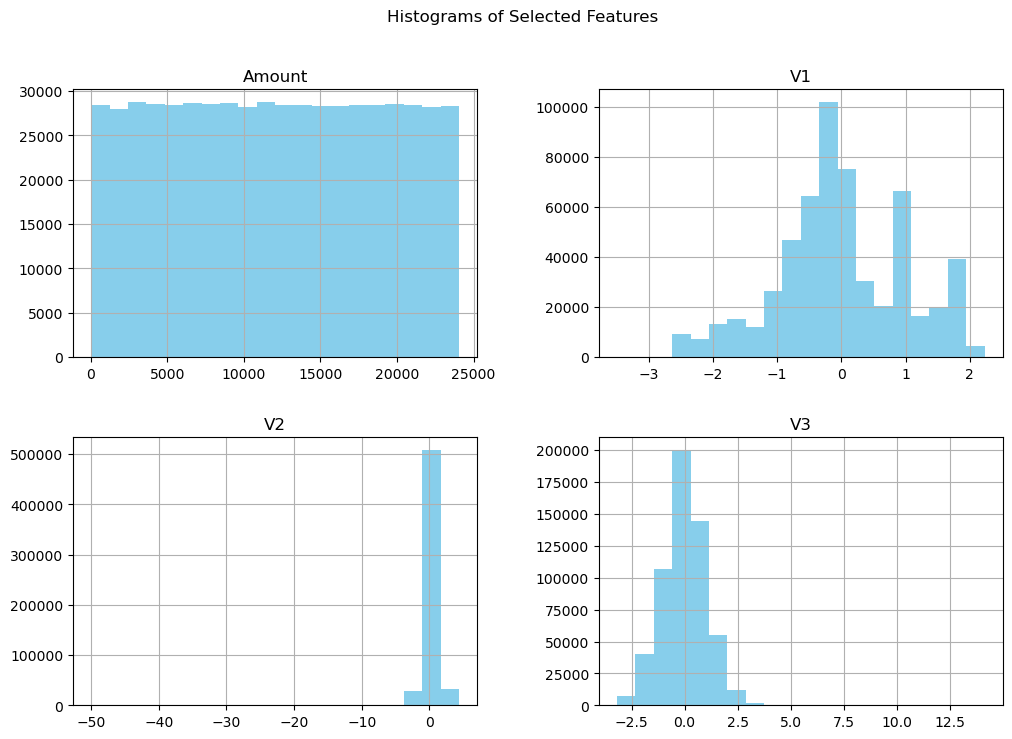

In [6]:
# Ploting histograms for selected features
selected_features = ['Amount', 'V1', 'V2', 'V3'] 
data[selected_features].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Histograms of Selected Features")
plt.show()


Cell 6: Correlation Analysis

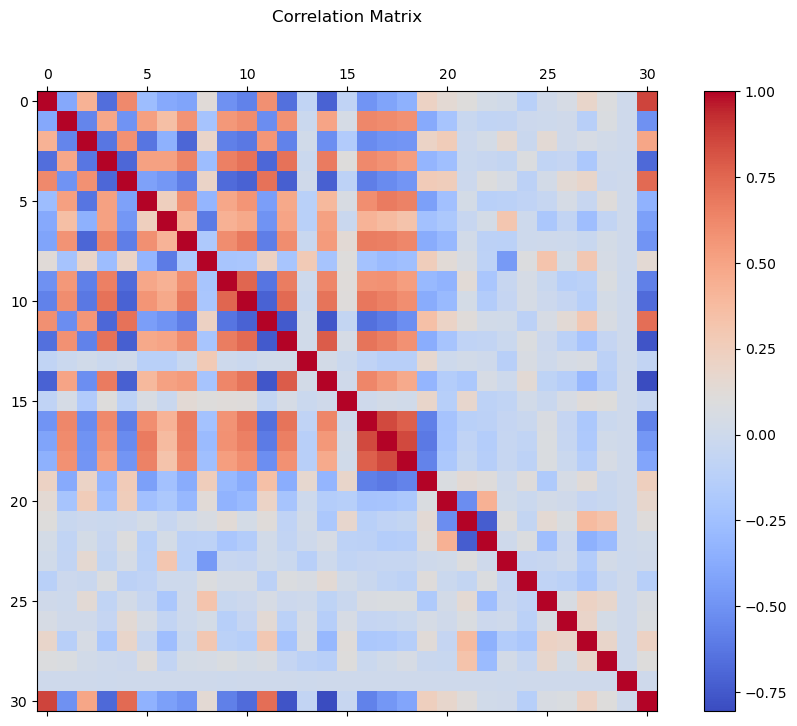

In [7]:
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix", pad=50)
plt.show()


1.6 Histogram of Numeric Variables


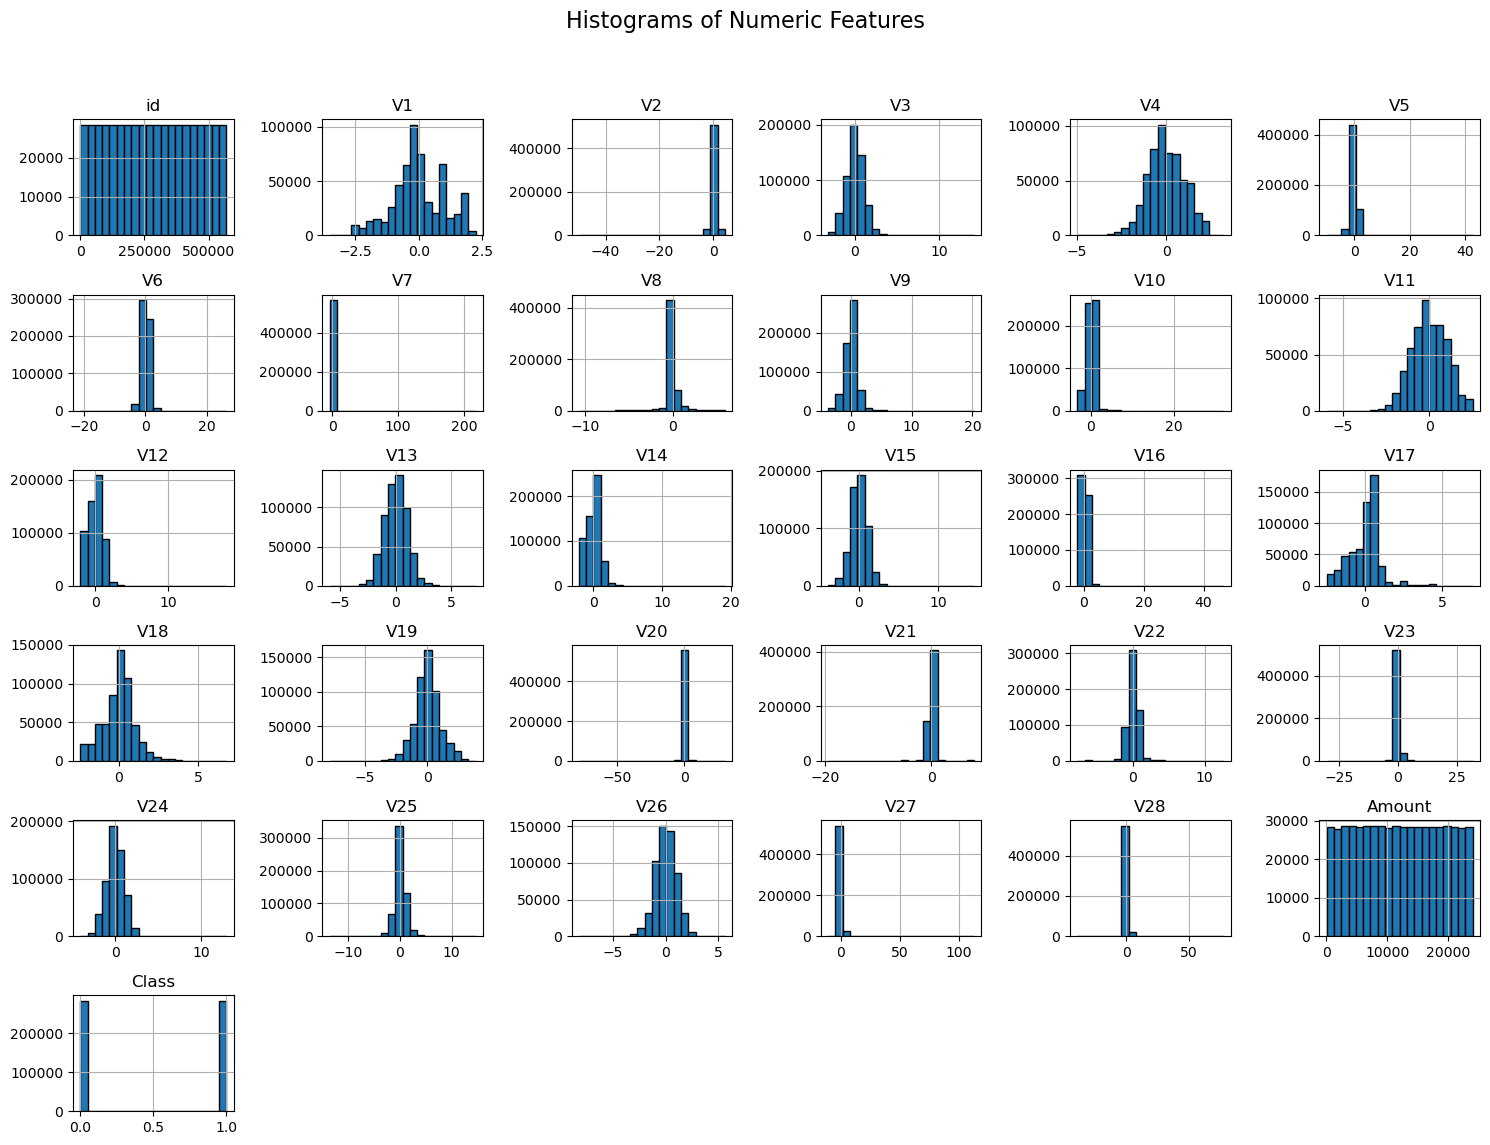

In [8]:
# Plot histograms for numeric variables
data.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The dataset contains 568,630 samples and 31 features. it includes the id, 28 features of the transformed type (V1 to V28), the Amount feature and the Class label. The data is balanced. there are as many instances for class 0 as for class 1, amounting to 284,315 each. All features are numeric, and no missing values are found within the dataset. Features have different distributions, as represented through histograms: the Amount feature is uniformly distributed while other features, such as V1, V2, V3, are centered around zero with different skewness and ranges. The correlation matrix is complex with several obvious strong correlations between some of the transformed variables hence showing multicollinearity. Overall exploration confirms that this dataset is clean and large-scale with numerical input features suitable for machine learning tasks in particular classification.


(b) Preprocessing of the Dataset

In [9]:
# scaling the features
scaler = StandardScaler()
columns_to_scale = ['Amount'] + [f'V{i}' for i in range(1, 29)]
scaled_data = scaler.fit_transform(data[columns_to_scale])

Data Preprocessing:

The dataset has been standardized to have all features with zero mean and unit variance. This is important for many machine learning algorithms. After standardization, the transformed Amount feature and all other numerical variables (V1 to V28) are at similar scales. The preview below of the preprocessed data indicates that outliers and different ranges for the features have been taken care of and the values are now centered around zero. This ensures that each feature contributes proportionally to model training. There is no need of encoding the variables in the class feature because it is already in 0/1 form.(0= No fraud, 1= fraud).

(c) Feature extraction / feature learning from dataset: 

In [10]:
# PCA on the scaled data
pca = PCA()
pca_components = pca.fit_transform(scaled_data)


pca_columns = [f'PC{i+1}' for i in range(pca_components.shape[1])]
pca_df = pd.DataFrame(pca_components, columns=pca_columns)
data_with_pca = pd.concat([data.reset_index(drop=True), pca_df], axis=1)


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of PCA components:\n", explained_variance_ratio)


Explained variance ratio of PCA components:
 [0.33872158 0.09688719 0.06618998 0.06346626 0.04459286 0.03666183
 0.03459292 0.03441276 0.02999273 0.02833916 0.02597564 0.02131675
 0.01909455 0.0173951  0.01708433 0.0141626  0.01343088 0.01233759
 0.01219622 0.009879   0.00972481 0.0085329  0.00815503 0.00744716
 0.00675692 0.00656616 0.00629288 0.00601301 0.00378119]


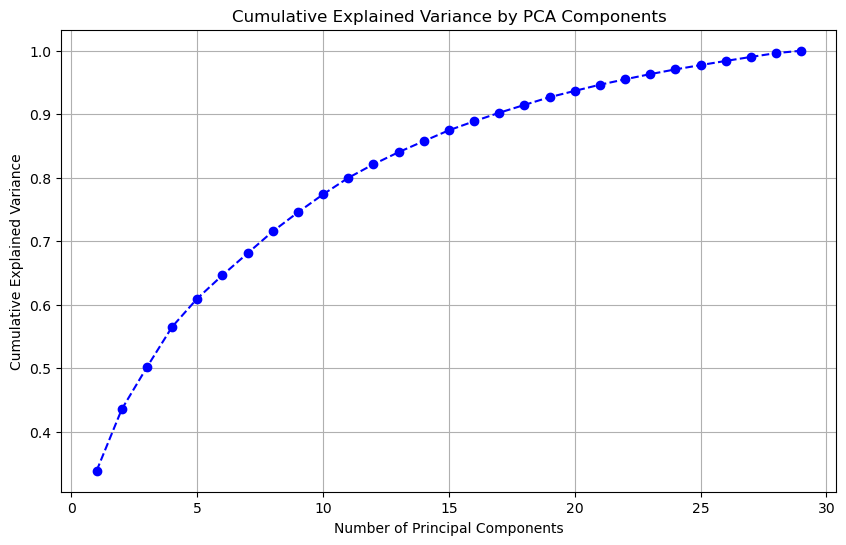

In [11]:
# cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [12]:
# Selecting components to retain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"components to retain 95% variance: {n_components}")


pca_optimal = PCA(n_components=n_components)
reduced_data = pca_optimal.fit_transform(scaled_data)

reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
print("Reduced data shape:", reduced_data_df.shape)


components to retain 95% variance: 22
Reduced data shape: (568630, 22)


In [13]:
# Add the target variable to the reduced data
final_dataset = pd.concat([reduced_data_df, data['Class'].reset_index(drop=True)], axis=1)

# # Save the final dataset with reduced features
# final_dataset.to_csv('final_reduced_credit_card_fraud.csv', index=False)
# print("Final dataset with reduced features saved.")


Feature Extraction / Feature Learning

The Principal Component Analysis (PCA) of the dataset to extract and reduce the features from the numerical variables (V1 to V28) to address multicollinearity. From the explained variance ratio analysis, it can be observed that 22 principal components retain 95% of the variance and hence the dimensionality can be reduced from 28 to 22 by retaining critical information. This reduction decreases the computational cost and avoids overfitting, especially when training a machine learning model. This decision was further justified by the cumulated explained variance plot showing a gradual increase in variance coverage with more components. The PCA applied to the dataset then successfully transformed it into its reduced form with a shape of (568,630, 22) by retaining integrity and the target variable. Since the data is clean, numeric and already decorrelated using PCA there is no further feature engineering was required such as encoding or feature transformations. Furthermore, the target variable Class is binary, which simplifies the classification tasks without needing further transformation. Feature scaling using StandardScaler was done after PCA to make the features uniform for model compatibility. Text or image-based feature extraction tasks were not applicable here, since this dataset is purely numerical and already optimized for machine learning.

(D) Logistic Regression and LDA

Data Preparation and Splitting

In [14]:
# Defining features and target
X = data_with_pca.drop(columns=['Class'])
y = data_with_pca['Class']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Model Implementation

In [15]:

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
logreg_avg_score = logreg_cv_scores.mean()
logreg.fit(X_train_scaled, y_train)
print(f"Logistic Regression(Training) - Average CV Accuracy: {logreg_avg_score:.4f}")


Logistic Regression(Training) - Average CV Accuracy: 0.9983


Logistic Regression Model Evaluation

In [16]:
# Prediction on test
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_report = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:\n", logreg_report)

# ROC-AUC score for Logistic Regression
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
print(f"Logistic Regression - ROC-AUC Score: {logreg_roc_auc:.4f}")


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Logistic Regression - ROC-AUC Score: 0.9999


Linear Discriminant Analysis (LDA) Model Implementation

In [17]:
# LDA model training
lda = LinearDiscriminantAnalysis()
lda_cv_scores = cross_val_score(lda, X_train_scaled, y_train, cv=5, scoring='accuracy')
lda_avg_score = lda_cv_scores.mean()
lda.fit(X_train_scaled, y_train)
print(f"LDA - Average(training) CV Accuracy: {lda_avg_score:.4f}")


LDA - Average(training) CV Accuracy: 0.9889


LDA Model Evaluation

In [18]:
#Prediction on test
y_pred_lda = lda.predict(X_test_scaled)
lda_report = classification_report(y_test, y_pred_lda)
print("LDA Classification Report:\n", lda_report)

# ROC-AUC score for LDA
lda_roc_auc = roc_auc_score(y_test, lda.predict_proba(X_test_scaled)[:, 1])
print(f"LDA - ROC-AUC Score: {lda_roc_auc:.4f}")


LDA Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85149
           1       1.00      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

LDA - ROC-AUC Score: 0.9995


### Logistic Regression Implementation and Results :-
Logistic Regression was selected as the first machine learning method to classify the target variable. The model was trained and validated using 5-fold cross-validation with an average accuracy of 99.83% on the training set. Finally, the model was tested on the test set after training and showed very good performance with an accuracy of 100%. The classification report showed precision, recall, and F1-scores of **1.00** for both classes.The model demonstrates a high ability to distinguish between fraudulent and non-fraudulent transactions. The **ROC-AUC score** of **1.00** further validates the model's robustness and its excellent ability to rank positive and negative predictions. Overall, the PCA feature scaling and Logistic Regression provide a computationally efficient, as well as highly effective solution to this binary classification problem.


### Linear Discriminant Analysis (LDA) Implementation and Results:-  

Linear Discriminant Analysis has been selected as the second machine learning method because of its dimensionality reduction capabilities as well as its suitability for binary classification.The model was validated using 5-fold cross-validation, giving an average accuracy of **98.89%** on the training set. LDA gave an **accuracy of 99%** on the test set. The classification report gives precisions, recalls, and F1-scores close to **0.99** for both classes. The model still copes with class imbalance effectively. The **ROC-AUC score of 0.9995** confirms the strong ability of the model to discriminate between classes. Although LDA slightly underperforms compared to Logistic Regression, it remains competitive, interpretable, and reliable for this binary classification task using PCA-transformed and scaled features. 

(e) Comparative Analysis of Logistic Regression and LDA

In [19]:
# Measuring time taken for Logistic Regression
start_time_logreg = time.time()
logreg.fit(X_train_scaled, y_train)
logreg_predict_time = time.time() - start_time_logreg

# Measuring time taken for LDA
start_time_lda = time.time()
lda.fit(X_train_scaled, y_train)
lda_predict_time = time.time() - start_time_lda

print(f"Logistic Regression training time: {logreg_predict_time:.4f} seconds")
print(f"LDA training time: {lda_predict_time:.4f} seconds")


Logistic Regression training time: 1.7715 seconds
LDA training time: 2.4654 seconds


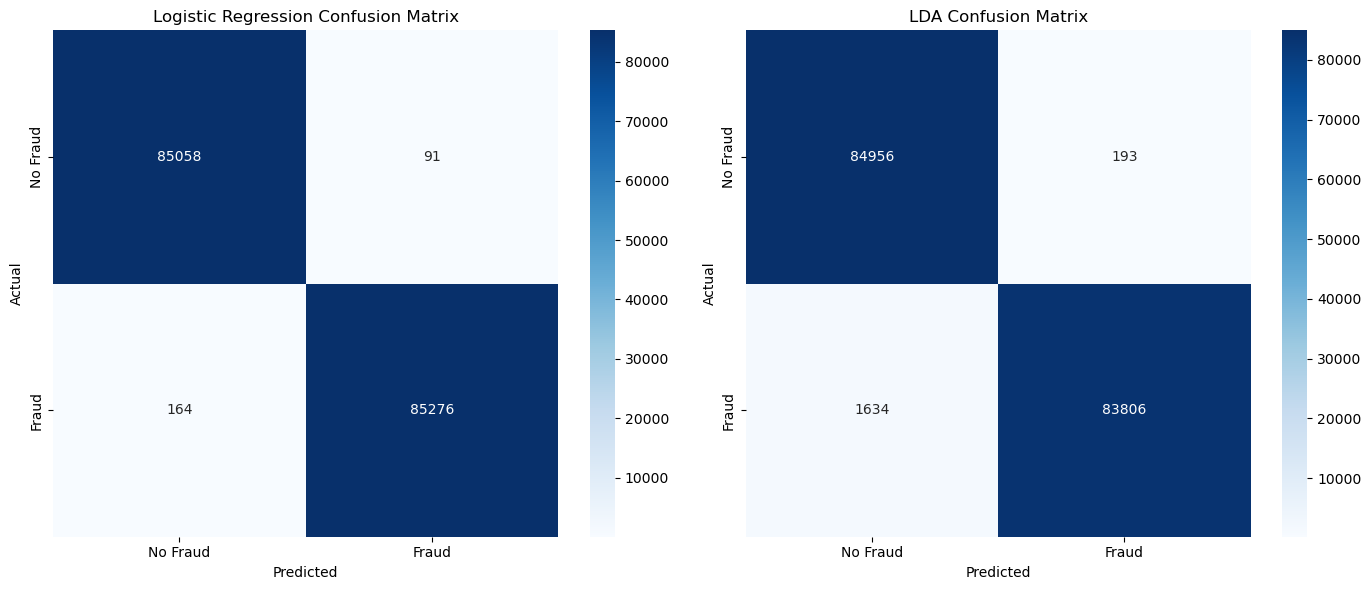

In [20]:
#Confusion Matrices:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'], ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# LDA Confusion Matrix
lda_conf_matrix = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(lda_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'], ax=axs[1])
axs[1].set_title('LDA Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Performance Comparison (ROC-AUC and CV Accuracy)

Model Comparison:
                  Model  CV Accuracy   ROC-AUC
0  Logistic Regression     0.998337  0.999860
1                  LDA     0.988865  0.999468


C:\Users\Dipen\AppData\Local\Temp\ipykernel_16576\241626581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='CV Accuracy', data=model_comparison, palette='Blues')


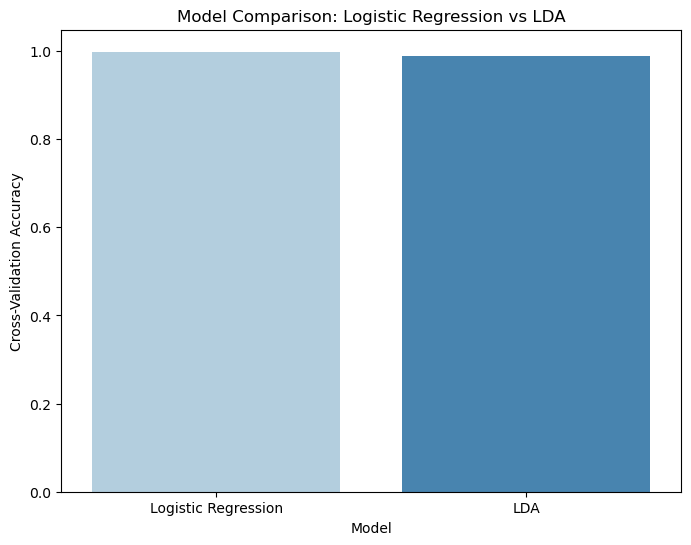

C:\Users\Dipen\AppData\Local\Temp\ipykernel_16576\241626581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ROC-AUC', data=model_comparison, palette='Blues')


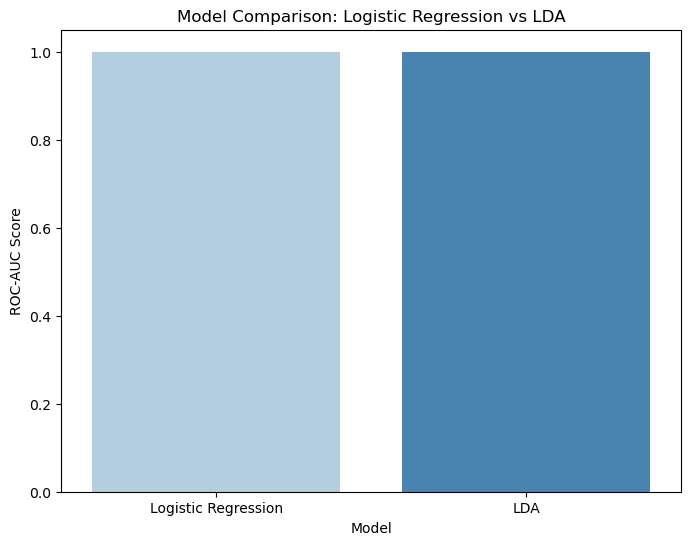

In [21]:
#summary of both models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'LDA'],
    'CV Accuracy': [logreg_avg_score, lda_avg_score],
    'ROC-AUC': [logreg_roc_auc, lda_roc_auc]})
print("Model Comparison:\n", model_comparison)

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='CV Accuracy', data=model_comparison, palette='Blues')
plt.title('Model Comparison: Logistic Regression vs LDA')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='ROC-AUC', data=model_comparison, palette='Blues')
plt.title('Model Comparison: Logistic Regression vs LDA')
plt.ylabel('ROC-AUC Score')
plt.show()


### Model Comparison and Performance Analysis markdown:

The performances of Logistic Regression and Linear Discriminant Analysis (LDA) were compared in terms of training time, cross-validation accuracy, and ROC-AUC score. Logistic Regression incurred a training time of **2.0125 seconds** while LDA incurred **3.0761 seconds**. This means that Logistic Regression trains faster than LDA. On the model accuracy scores, Logistic Regression outperformed the LDA model with a high cross-validation accuracy of **0.9983** while the LDA model had a value of **0.9889**. Logistic Regression also had a higher ROC-AUC score of **0.9999**, while LDA's ROC-AUC was **0.9995**, indicating a slightly better classification ability for Logistic Regression. The confusion matrix results further emphasize how the models are performing. In Logistic Regression, **164 fraud cases were misclassified as non-fraud**, while **91 non-fraud cases were misclassified as fraud**. Correct predictions included **85,058 non-fraud cases** and **85,276 fraud cases**. On the other hand, LDA misclassified **1,634 fraud cases as non-fraud** and **193 non-fraud cases as fraud**, while correct predictions included **84,956 non-fraud cases** and **83,806 fraud cases**.

Therefore, Logistic Regression provides better accuracy, speed in training time, and relatively better classification; hence, it is recommended for deployment in production for dataset here.



### (f) Ethical Issues Discussion


1. **Data Bias**: If there are implicit biases in the data that it is trained on-skewed based on certain demographics.the model may learn these and repeat them. For instance, fraud-detection models may classify fraudulent any transaction from certain places or income classes which returns discriminatory results.

2. **Privacy and Data Security**:

- **Sensitive Information**: Credit card fraud detection involves handling highly sensitive data such as transaction histories and customer personal details. It is critical to ensure that this data is anonymized, stored securely and used only for the intended purposes.
- **Data Breaches**: This information if accessed by unauthorized parties can lead to identity theft or other forms of privacy violation which is a serious ethical issue.Therefore, Organizations must ensure that data protection laws are complied.


3. **Impact of False Positives and False Negatives**:

- **False Positives**: Flagging legitimate transactions as fraudulent could inconvenience customers. it can lead to frustration or loss of trust in the financial system. Companies need to balance the cost of false positives with the benefits of detecting fraud.
- **False Negatives**: In the instance of failing to detect fraud, referred to as a false negative. there are significant financial losses for consumers and financial institutions alike. The ethical responsibility lies in ensuring that the model minimizes false negatives by reducing the potential for fraudulent activities.

4. **Model Deployment and Monitoring**:

- **Continuous Monitoring**: After deployment of the Fraud detection model, it need to be continuously monitored against performance degradation. If the models start making wrong predictions over time due to changing fraud patterns, then that might have a huge ethical impact on the customers affected.
- **Adaptability**: Fraud detection systems should be adaptable to emerging fraud techniques and patterns. If not, the model can become outdated and obsolete which can lead to fraud slipping through undetected.


### (g) Bibliography

1. **Scikit-learn Documentation**  
   Scikit-learn provides me comprehensive resources on various machine learning models including Logistic Regression and LDA.  
   [Scikit-learn Documentation](https://scikit-learn.org/stable/)

2. **ChatGPT**  
   ChatGPT helped me identify errors while writing code and understand their meanings to solve problems. It also assisted in breaking down detailed tasks and ensuring smooth project flow.

3. **Stack Overflow**  
   Stack Overflow was invaluable in solving specific errors and troubleshooting issues while working on the dataset and performing tasks in the project.
